In [1]:
import numpy as np
import tools
import matplotlib.pyplot as plt

In [2]:
images, data, target = tools.load_data()

In [3]:
scaler, data = tools.scale(data)
pca, feature_reduced_data = tools.reduce(data,40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_reduced_data, target, test_size=0.2, random_state=10)
clf = tools.ANN(X_train,y_train)

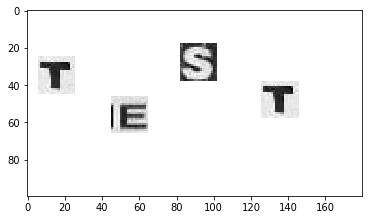

In [29]:
img = plt.imread('data/detection-images/detection-1.jpg')[50:150,20:220]
plt.imshow(img, cmap='gray', interpolation="nearest")
plt.show()

In [30]:
def flatten_img(image):
    return [float(i) for line in image for i in line]

def sliding_window(image, stepSize, windowSize):
    windows = []
    flattened = []
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize[1]):
        for x in range(0, image.shape[1], stepSize[0]):
            window = img[y:(y+windowSize[1]),x:(x+windowSize[0])]
            flat = flatten_img(window)
            unique, counts = np.unique(flat, return_counts=True)
            if dict(zip(unique, counts))[255.0] < 200: # Large parts of window white
                windows.append(window)
                flattened.append(flat)
    return np.array(windows), np.array(flattened)

In [31]:
windows, flattened = sliding_window(img,[20,20],[20,20])
print(windows.shape)

(4, 20, 20)


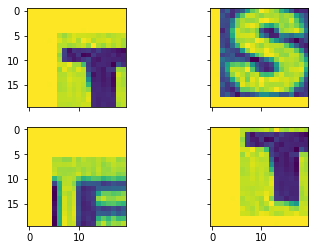

In [36]:
dim = [2,2]
fig, axs = plt.subplots(dim[0], dim[1])
count = 0
for i in range(dim[0]):
    for j in range(dim[1]):
        if dim[0] == 1:
            axs[j].imshow(windows[count])
            axs[j].label_outer()
        else:        
            axs[i,j].imshow(windows[count])
            axs[i,j].label_outer()
        count+=1
plt.show()

In [33]:
scaled_windows = scaler.transform(flattened)
reduced_windows = pca.transform(scaled_windows)

In [34]:
word = []
for i in range(len(reduced_windows)):
    word.append(clf.predict([reduced_windows[i]])[0])
    preds = tools.top_predictions(clf,reduced_windows,i,5)
    print("Predictions for image "+str(i+1)+":")
    for p in preds:
        print(p[0],"=>",p[1])
print(word)

Predictions for image 1:
n => 56.81%
h => 27.78%
r => 9.07%
a => 2.85%
i => 2.11%
Predictions for image 2:
s => 96.91%
r => 0.89%
k => 0.52%
p => 0.52%
a => 0.4%
Predictions for image 3:
l => 79.97%
v => 5.71%
e => 5.37%
j => 3.2%
r => 2.14%
Predictions for image 4:
j => 99.99%
a => 0.01%
l => 0.0%
n => 0.0%
t => 0.0%
['n', 's', 'l', 'j']
